Earnings Call Transcripts contain actionable insights. Capture them, at scale.

Analyst calls around earnings are scheduled quarterly for publicly listed companies, and similar conference calls cover activities including mergers and acquisitions, or CEO changes. Each disclosure may reveal information that materially impacts company strategy or stock valuation, but reviewing transcripts is time-consuming.

In [15]:
%matplotlib inline
import math
import time
import numpy as np
import torch
import random
from d2l import torch as d2l

In [3]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [7]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10546 sec'

In [8]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00028 sec'

In [9]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [11]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.0927, -0.3855]) 
label: tensor([5.3305])


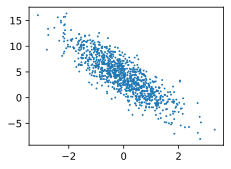

In [14]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [20]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4813, -0.0690],
        [-1.2724,  2.0746],
        [ 0.7320, -0.7591],
        [ 0.1830, -0.0237],
        [-0.2389,  0.1428],
        [-0.7455, -0.5308],
        [ 1.3731, -0.7924],
        [-0.4322,  0.3255],
        [ 0.9580,  0.3166],
        [ 0.1205, -0.5307]]) 
 tensor([[ 5.4139],
        [-5.4046],
        [ 8.2403],
        [ 4.6408],
        [ 3.2390],
        [ 4.5133],
        [ 9.6483],
        [ 2.2292],
        [ 5.0504],
        [ 6.2577]])


In [18]:
data_iter(batch_size, features, labels)

<generator object data_iter at 0x7fa9a990d350>

In [22]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

w, b

(tensor([[-0.0106],
         [-0.0116]], requires_grad=True),
 tensor([0.], requires_grad=True))